# P10 détecter des faux billets avec Python

## importation des packages et chargement des données

Les packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

Les données

In [2]:
df_billets = pd.read_csv('billets.csv', sep=';')

In [3]:
df_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Encodage de la feature discrète is_genuine : vrai billet -> 0 , faux billet -> 1

In [6]:
# encodage pour la variable "is_genuine"

df_billets['is_genuine'].replace([True,False],[0,1],inplace=True)

observation des liens entre 2 variables

In [7]:
df_billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,171.81,104.86,104.95,4.52,2.89,112.83
1,0,171.46,103.36,103.66,3.77,2.99,113.09
2,0,172.69,104.48,103.50,4.40,2.94,113.16
3,0,171.36,103.91,103.94,3.62,3.01,113.51
4,0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,1,171.75,104.38,104.17,4.42,3.09,111.28
1496,1,172.19,104.63,104.44,5.27,3.37,110.97
1497,1,171.80,104.01,104.12,5.51,3.36,111.95
1498,1,172.06,104.28,104.06,5.17,3.46,112.25


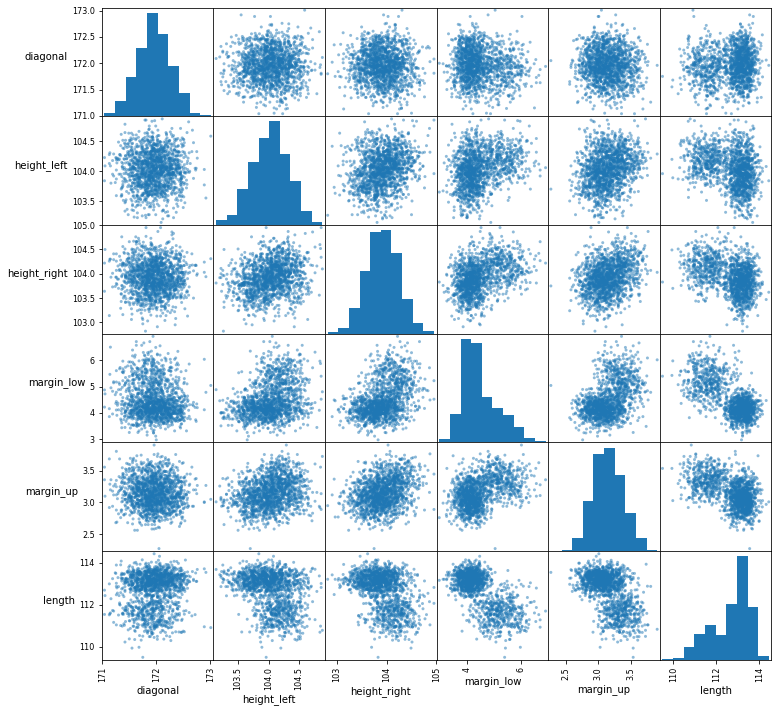

In [5]:
axes = pd.plotting.scatter_matrix(df_billets[['diagonal','height_left','height_right','margin_low','margin_up','length']],diagonal='hist', figsize=(12,12))

for ax in axes.flatten():
    
    ax.yaxis.label.set_rotation(0)
    
    ax.yaxis.label.set_ha('right')
    
plt.show()

## Quels sont les variables que nous allons pouvoir exploiter ? (pour la classification)
### Je vais utiliser une Analyse en Composante Principale pour vérifier la pertinence des variables.

In [6]:
# j'utilise un filtre pour enlever les individus avec des valeurs manquantes
df_billets[df_billets.isna()['margin_low']==False]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,171.81,104.86,104.95,4.52,2.89,112.83
1,0,171.46,103.36,103.66,3.77,2.99,113.09
2,0,172.69,104.48,103.50,4.40,2.94,113.16
3,0,171.36,103.91,103.94,3.62,3.01,113.51
4,0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,1,171.75,104.38,104.17,4.42,3.09,111.28
1496,1,172.19,104.63,104.44,5.27,3.37,110.97
1497,1,171.80,104.01,104.12,5.51,3.36,111.95
1498,1,172.06,104.28,104.06,5.17,3.46,112.25


In [7]:
# choix du nombre de composantes
n_comp = 3

# on standardise le dataframe
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(df_billets[df_billets.isna()['margin_low']==False][
    ['diagonal','height_left','height_right','margin_low','margin_up','length']])

X = df_billets[df_billets.isna()['margin_low']==False]
X[['diagonal','height_left','height_right','margin_low','margin_up','length']] = scaler.transform(X[
    ['diagonal','height_left','height_right','margin_low','margin_up','length']])

# ACP
from sklearn import decomposition

pca = decomposition.PCA(n_components= n_comp)
pca.fit(X[['diagonal','height_left','height_right','margin_low','margin_up','length']])

PCA(n_components=3)

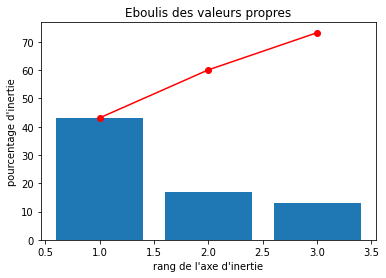

In [8]:
# éboulis des valeurs propres
from functions2 import *

display_scree_plot(pca)

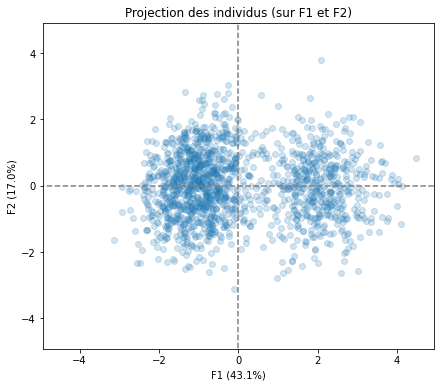

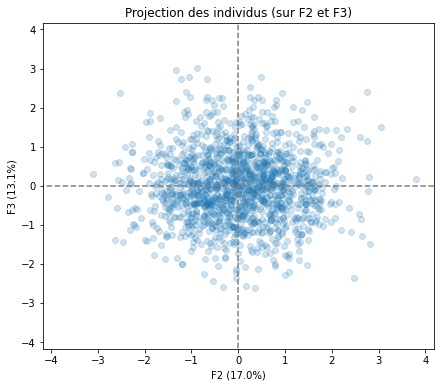

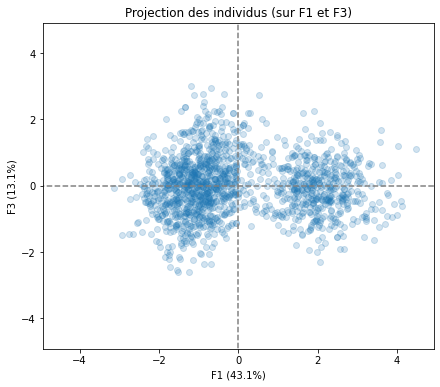

In [9]:
# projection des individus
X_projected = pca.transform(X[['diagonal','height_left','height_right','margin_low','margin_up','length']])
display_factorial_planes(X_projected,n_comp,pca,[(0,1),(1,2),(0,2)], alpha = 0.2)

plt.show()

<Figure size 1296x1512 with 0 Axes>

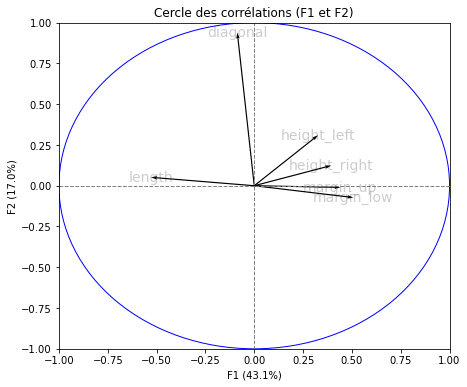

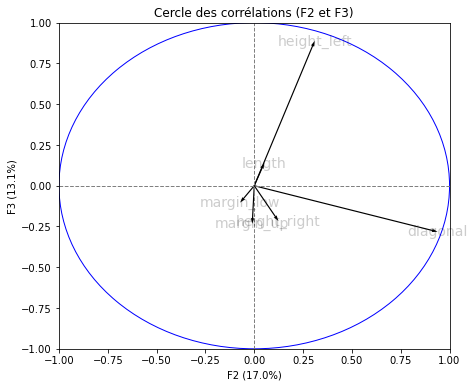

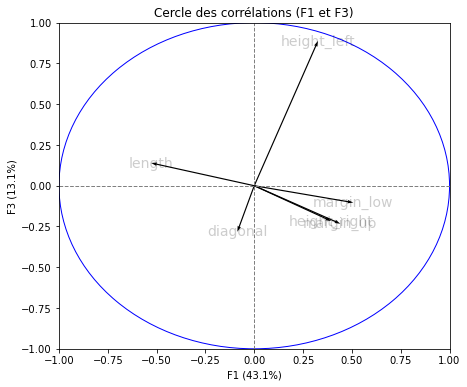

In [10]:
# cercle des corrélations
features = X[['diagonal','height_left','height_right','margin_low','margin_up','length']].columns

pcs = pca.components_

plt.figure(figsize=(18,21))

display_circles(pcs, n_comp, pca, [(0,1),(1,2),(0,2)], labels = np.array(features))

Il n'y a pas deux features confondues

#### matrice de corrélation des features, voillons quelles features sont corrélées avec is_genuine 

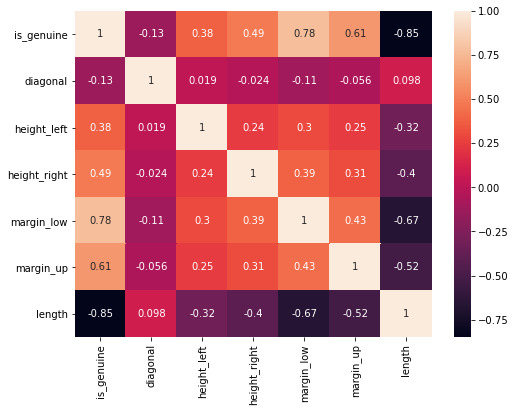

In [11]:
# matrice de corrélation entre features

corr_df = df_billets.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

# 

Pour la classification, toutes les features semblent pertinentes, à part peut être "diagonal" 

## Remplacer les vareurs manquantes de la colonne "margin low"
### Cherchons des variables corrélés avec "margin_low"

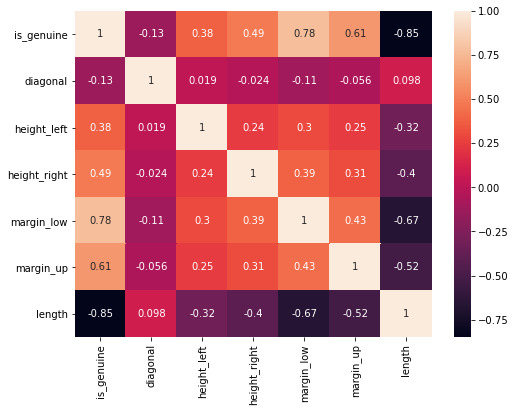

In [12]:
# matrice de corrélation entre features

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

 plusieurs features sont corrélées à "margin low" 

## je vais chercher à faire une regression linéaire multiple
#### Split

In [13]:
# split du dataframe 
y = df_billets['is_genuine']
X = df_billets.loc[:,(df_billets.columns != 'is_genuine')]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=111)

In [14]:
# X et y pour la régression
y_train_reg = X_train['margin_low']
X_train_reg = X_train[['diagonal','height_left','height_right','margin_up','length']]

y_test_reg = X_test['margin_low']
X_test_reg = X_test[['diagonal','height_left','height_right','margin_up','length']]

#### entrainement

In [15]:
# j'entraine le modèle de régression avec les données complètes du train set

from sklearn import linear_model

reg_multi = linear_model.LinearRegression()

reg_multi.fit(X_train_reg[X_train_reg.index.isin(y_train_reg[y_train_reg.isna()].index)==False],y_train_reg[y_train_reg.isna()==False])

# score du modèle
reg_multi.score(X_train_reg[X_train_reg.index.isin(y_train_reg[y_train_reg.isna()].index)==False],y_train_reg[y_train_reg.isna()==False])

0.48596259680123344

#### observations et indicateurs

In [16]:
# le coef R2 est faible 48,5%
# sur les tests de significativité, on constate que les p-values sont inférieures à 5%, donc chaque variable est significative
import statsmodels.api as sm

X2 = sm.add_constant(X_train_reg[X_train_reg.index.isin(y_train_reg[y_train_reg.isna()].index)==False])
est = sm.OLS(y_train_reg[y_train_reg.isna()==False], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     219.9
Date:                Tue, 31 May 2022   Prob (F-statistic):          3.16e-165
Time:                        10:56:39   Log-Likelihood:                -790.28
No. Observations:                1169   AIC:                             1593.
Df Residuals:                    1163   BIC:                             1623.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           18.7488     10.692      1.754   

In [17]:
# prévisions
y_reg_pred = reg_multi.predict(X_train_reg[X_train_reg.index.isin(y_train_reg[y_train_reg.isna()].index)==False])

from sklearn.metrics import *

print('Moyenne des erreurs absolues :',round(mean_absolute_error(y_train_reg[y_train_reg.isna()==False],y_reg_pred),2))
print('Moyenne des erreurs quadratiques :',round((np.sqrt(mean_squared_error(y_train_reg[y_train_reg.isna()==False],y_reg_pred))),2))
print('erreur quadratique médiane :',round(median_absolute_error(y_train_reg[y_train_reg.isna()==False],y_reg_pred),2))

Moyenne des erreurs absolues : 0.37
Moyenne des erreurs quadratiques : 0.48
erreur quadratique médiane : 0.31


#### Test

In [18]:
reg_multi.score(X_test_reg[X_test_reg.index.isin(y_test_reg[y_test_reg.isna()].index)==False],y_test_reg[y_test_reg.isna()==False])

0.4413783142589378

Je vais utiliser ce modèle de regression linéaire multiple

# Classification
Le but est de déterminer l'authenticité d'un billet

### Préparation des données pour la classification

impution des valeurs manquantes

In [19]:
# imputer les valeurs manquantes du train

X_train.loc[X_train.isna()['margin_low'],'margin_low'] = reg_multi.predict(X_train[X_train.isna()[
    'margin_low']][['diagonal','height_left','height_right','margin_up','length']])

# imputer les valeurs manquantes du test

X_test.loc[X_test.isna()['margin_low'],'margin_low'] = reg_multi.predict(X_test[X_test.isna()[
    'margin_low']][['diagonal','height_left','height_right','margin_up','length']])

Standardisation des données

In [20]:
# je standardise les données du train 
scaler = preprocessing.StandardScaler().fit(X_train)

X_train.loc[:,:] = scaler.transform(X_train)

# je standardise les données du test set par rapport aux données du train

X_test.loc[:,:] = scaler.transform(X_test)

In [21]:
X_train.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03
mean,6.789079e-14,1.543168e-14,-6.135277e-15,2.692291e-16,5.847175e-17,-9.882465e-15
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,-2.988536e+00,-2.932632e+00,-3.357565e+00,-2.278680e+00,-3.790759e+00,-3.616324e+00
25%,-6.708503e-01,-7.062839e-01,-6.277335e-01,-7.166904e-01,-6.760740e-01,-7.388530e-01
50%,1.466235e-02,2.475566e-02,-1.428816e-02,-2.465768e-01,-4.881115e-02,3.260379e-01
75%,7.001750e-01,6.893371e-01,6.911740e-01,5.874956e-01,7.082303e-01,7.565257e-01
max,3.442226e+00,2.782769e+00,3.175628e+00,3.665981e+00,3.303801e+00,1.991346e+00


## K means 

Méthode du coude pour déterminer le nombre de clusters

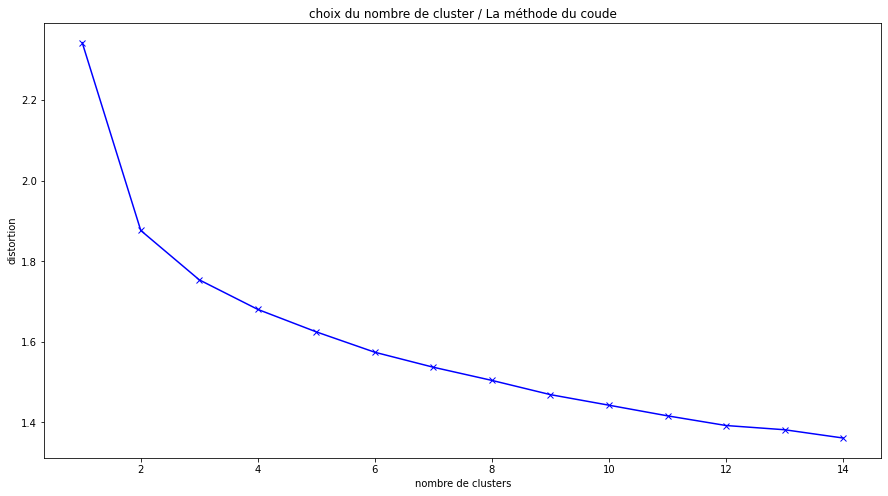

In [22]:
# chercher une valeur de cluster optimale
# construction d'un modèle de clustering

from sklearn import cluster
from scipy.spatial.distance import cdist

distortion = []
inertie = []
mapping1 = {}
mapping2 = {}
K = range(1,15)

for k in K:
    
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    
    distortion.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_,'euclidean'),axis=1))/X_train.shape[0])
    
    inertie.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'),axis=1))/X_train.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    
# visualistion du résultat

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(K,distortion,'bx-')   
plt.xlabel('nombre de clusters')
plt.ylabel('distortion')
plt.title('choix du nombre de cluster / La méthode du coude')

plt.show()

# on va choisir 3 clusters sinon on risque de faire de l'overfiting

#### Entrainement du model

In [23]:
from sklearn.cluster import KMeans

model_km = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
model_km.fit(X_train)
km_labels = model_km.labels_
centroids1 = model_km.cluster_centers_

#### Prévision

In [24]:
# matrice de corrélation entre les groupes des K-means et l'authenticité des billets
pd.crosstab(y_train,km_labels)

col_0,0,1,2
is_genuine,,,
0,408,3,389
1,3,388,9


#### remplacer les groupes des K-means par les groupes 0 et 1 de notre dataframe

    le groupe 0 des K means prédit des vrais billets (0)
    le groupe 1 des K means prédit des faux billets (1)
    le groupe 2 des K means prédit des vrais billets (0)

In [25]:
# score
km_score_train = 1-pd.crosstab(y_train,km_labels).min().sum()/pd.crosstab(y_train,km_labels).values.sum()
print("score du train set:",km_score_train)

score du train set: 0.9875


In [26]:
# j'enregistre un dictionnaire qui associe les groupes K-means aux groupes vrai et faux billets

dict_km = {}

for i in range(2,-1,-1):
    if pd.crosstab(y_train,km_labels).loc[0,i] > pd.crosstab(y_train,km_labels).loc[1,i]:
        km_labels[km_labels==i]=0
        dict_km[i]=0
    else:
        km_labels[km_labels==i]=1
        dict_km[i]=1

# matrice de confusion
pd.crosstab(y_train,km_labels)

col_0,0,1
is_genuine,,
0,797,3
1,12,388


#### Test set

In [27]:
# prédire les groupes du test

km_labels_test = model_km.predict(X_test)


# remplacer les groupes des K-means par les groupes 0 et 1 de notre dataframe

for i in range(2,-1,-1):
    if pd.crosstab(y_test,km_labels_test).loc[0,i] > pd.crosstab(y_test,km_labels_test).loc[1,i]:
        km_labels_test[km_labels_test==i]=0
    else:
        km_labels_test[km_labels_test==i]=1

# calculer le score

km_score_test = 1-pd.crosstab(y_test,km_labels_test).min().sum()/pd.crosstab(y_test,km_labels_test).values.sum()
print("score du test set:",km_score_test)

score du test set: 0.9866666666666667


In [28]:
# matrice de confusion
pd.crosstab(y_test,km_labels_test)

col_0,0,1
is_genuine,,
0,199,1
1,3,97


## Régression logistique

In [29]:
from sklearn.linear_model import LogisticRegression

model_rl = LogisticRegression()

#### Est-il favorable de garder toutes les variables ? on va comparer le score obtenu en fonction du nombre de variables

Je vais utiliser la méthode "recursive feature elimination"

nombre de features optimal: 3
features sélectionnés: ['margin_low', 'margin_up', 'length']


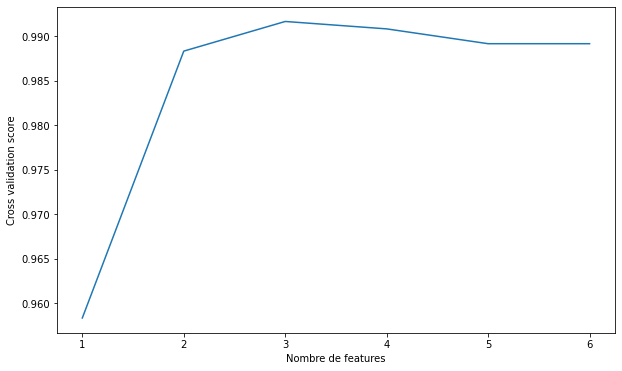

In [30]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

rfe = RFE(model_rl,5)
rfe = rfe.fit(X_train,y_train)


rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)

print("nombre de features optimal: %d" % rfecv.n_features_)
print('features sélectionnés: %s' % list(X.columns[rfecv.support_]))

# nombre de variable en fonction des scores de cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Nombre de features")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# on peut garder deux à six variables 

#### Je vais utiliser 3 variables pour l'algorythme

In [31]:
model_rl = LogisticRegression()

# entrainement du modèle

model_rl.fit(X_train[['margin_low', 'margin_up', 'length']],y_train)

LogisticRegression()

In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(5)
print("score du train set:",cross_val_score(model_rl,X_train,y_train, cv=cv).mean())

score du train set: 0.99


In [33]:
# matrice de confusion
pd.crosstab(y_train,model_rl.predict(X_train[['margin_low', 'margin_up', 'length']]))

col_0,0,1
is_genuine,,
0,798,2
1,7,393


#### Test set

In [34]:
# valider le modèle Bagging
print("score du test set:",model_rl.score(X_test[['margin_low', 'margin_up', 'length']],y_test))

score du test set: 0.9866666666666667


In [35]:
# matrice de confusion
pd.crosstab(y_test,model_rl.predict(X_test[['margin_low', 'margin_up', 'length']]))

col_0,0,1
is_genuine,,
0,198,2
1,2,98


## K Neighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier


random.seed(111)

model_kn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
model_kn.fit(X_train,y_train)

cv = StratifiedKFold(5)
cross_val_score(model_kn,X_train,y_train, cv=cv).mean()

0.99

#### Test set

In [37]:
# valider le modèle K neighbors
model_kn.score(X_test,y_test)

0.9866666666666667

## Bagging Classifier

In [38]:
from sklearn.ensemble import BaggingClassifier

random.seed(111)

model_ba = BaggingClassifier(n_estimators=23)
model_ba.fit(X_train,y_train)

cv = StratifiedKFold(5)
cross_val_score(model_ba,X_train,y_train, cv=cv).mean()

0.9875

#### Test set

In [39]:
# valider le modèle Bagging
model_ba.score(X_test,y_test)

0.9766666666666667

#### Je vais retenir la méthode de régression linéaire

## Set(s) de production

In [40]:
# récupération des données
df_billets_prod = pd.read_csv('billets_production.csv')

Imputer les données manquantes

In [41]:
if len(df_billets_prod.loc[df_billets_prod.isna()['margin_low']]) > 0:
    df_billets_prod.loc[df_billets_prod.isna()['margin_low'],'margin_low'] = reg_multi.predict(df_billets_prod[df_billets_prod.isna()[
        'margin_low']][['diagonal','height_left','height_right','margin_up','length']])

#### Prédiction avec le modèle de la régression logistique

In [42]:
# standardisation du dataframe
df_billets_prod[['diagonal','height_left','height_right','margin_low','margin_up','length']] = scaler.transform(df_billets_prod[
        ['diagonal','height_left','height_right','margin_low','margin_up','length']])

# prédiction
df_billets_prod['prédiction'] = model_rl.predict(df_billets_prod[['margin_low', 'margin_up', 'length']])
df_billets_prod['prédiction'] = np.where(df_billets_prod['prédiction']==1,"faux billet","vrai billet")

# dé-standardisation du dataframe
df_billets_prod[['diagonal','height_left','height_right','margin_low','margin_up','length']] = scaler.inverse_transform(df_billets_prod[
        ['diagonal','height_left','height_right','margin_low','margin_up','length']])

df_billets_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prédiction
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,faux billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,faux billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,faux billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,vrai billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,vrai billet


In [47]:
# récupération des données
df_billets_prod = pd.read_csv('billets_test (1).csv')

# standardisation du dataframe
df_billets_prod[['diagonal','height_left','height_right','margin_low','margin_up','length']] = scaler.transform(df_billets_prod[
        ['diagonal','height_left','height_right','margin_low','margin_up','length']])

# prédiction
df_billets_prod['prédiction'] = model_rl.predict(df_billets_prod[['margin_low', 'margin_up', 'length']])
df_billets_prod['prédiction'] = np.where(df_billets_prod['prédiction']==1,"faux billet","vrai billet")

# dé-standardisation du dataframe
df_billets_prod[['diagonal','height_left','height_right','margin_low','margin_up','length']] = scaler.inverse_transform(df_billets_prod[
        ['diagonal','height_left','height_right','margin_low','margin_up','length']])

df_billets_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prédiction
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,vrai billet
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,faux billet
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,vrai billet
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,faux billet
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,faux billet


#### prédiction avec le modèle des K-means

In [44]:
# récupération des données
df_billets_prod = pd.read_csv('billets_test (2).csv')

# standardisation du dataframe
df_billets_prod[['diagonal','height_left','height_right','margin_low','margin_up','length']] = scaler.transform(df_billets_prod[
        ['diagonal','height_left','height_right','margin_low','margin_up','length']])

# prédiction
df_billets_prod['prédiction'] = model_km.predict(df_billets_prod[['diagonal','height_left','height_right','margin_low','margin_up','length']])

# conversion des groupes k-means en groupes vrai/faux billets
ma_liste = []
for i in df_billets_prod['prédiction']:
    ma_liste.append(dict_km[i])
df_billets_prod['prédiction'] = ma_liste

df_billets_prod['prédiction'] = np.where(df_billets_prod['prédiction']==1,"faux billet","vrai billet")

# dé-standardisation du dataframe
df_billets_prod[['diagonal','height_left','height_right','margin_low','margin_up','length']] = scaler.inverse_transform(df_billets_prod[
        ['diagonal','height_left','height_right','margin_low','margin_up','length']])

df_billets_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prédiction
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,vrai billet
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,faux billet
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,vrai billet
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,faux billet
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,faux billet


### enregistrer le modèle

In [45]:
import pickle as pkl

pkl.dump(model_rl,open('Chéron_Pablo_2_model_052022.pk1','wb'))